# Homework 7

Luke Telfer  
October 16, 2020

Practicing correlation and simple linear regression...

In [2]:
library(car) # contains functions for ANOVA
library(grDevices) # graphing package

## Part A

**Scenario:** A farmer friend of yours has lots of free time so they select 6 of their fields and collect data on how much rain the field got in 2019 and the crop yield (in bushels) for 2019 for each field. They want to know how rainfall and yield are related.  They ask you to analyze the data for them and explain the outcome in statistical terms and practical language.

**Answer:** The most appropriate test is a linear regression.  The justification is that we are exploring a causal relationship with rainfall as the independent variable and crop yield as the dependent variable. In other words, we are looking at how crop yield is influenced by the amount of rainfall.  The results of the linear regression suggest that crop yields are higher when rainfall is greater.  Specifically, you can estimate the crop yield with the following equation: `yield = 189.2(rainfall) - 117.2`.

**Linear Regression (by hand):**

In [3]:
# create dataframe
rainstudy = data.frame(Plot=c(1,2,3,4,5,6),
                       Rainfall=c(3,7,11,17,19,23),
                       Yield=c(920,740,2130,2990,2660,4990))

In [4]:
# estimate regression coefficient (b)
x_bar = mean(rainstudy$Rainfall)
y_bar = mean(rainstudy$Yield)
b = sum((rainstudy$Rainfall - x_bar) * (rainstudy$Yield - y_bar)) / 
    sum((rainstudy$Rainfall - x_bar)^2)
b

[1] 189.1648

In [5]:
# calculate intercept (b0)
b0 = y_bar - (b * x_bar)
b0

[1] -117.1968

In [6]:
# check answer using R
rain_lm <- lm(Yield ~ Rainfall, data=rainstudy)
rain_lm


Call:
lm(formula = Yield ~ Rainfall, data = rainstudy)

Coefficients:
(Intercept)     Rainfall  
     -117.2        189.2  


`Yield = 189.2(Rainfall) - 117.2`

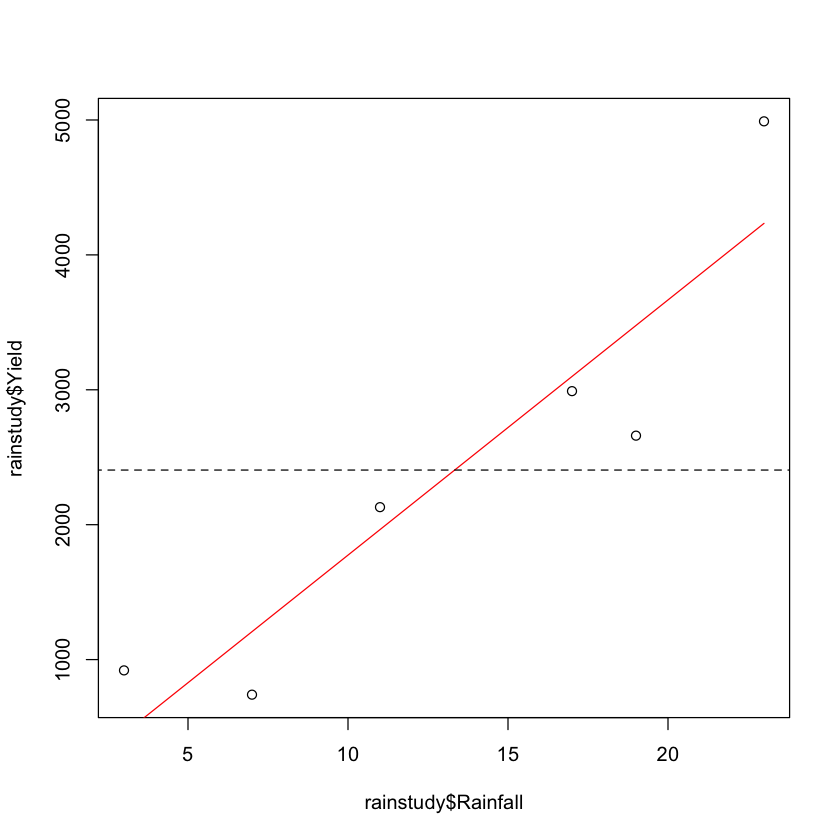

In [7]:
# create a scatter plot to view data
plot(rainstudy$Yield ~ rainstudy$Rainfall)

# add regression line
x <- seq(min(rainstudy$Rainfall), max(rainstudy$Rainfall), l=10)
lines(x,b0+b*x,col='red')

# add line for y_bar
lines(c(0,30),c(y_bar,y_bar),lty=2)

## Part B

F is maximized when the amount of variation explained by the model (regression) is maximized and the unexplained (residual) error is minimized.  
* In a linear regression (where model df = 1), the amount of variation explained by the model is maximized when the squared difference between the predicted values and the mean measured value (model sum of squares) is maximized.  The greater the model sum of squares, the more effect the treatment has on the outcome.  
* The unexplained error is minimized when the squared difference between the predicted values and the corresponding measured values is minimized and when the degrees of freedom (sample size) is maximized.  In other words, when the model accurately predicts a lot of values, there is very little unexplained error because nearly all of the variation is explained by the model.

## Part C

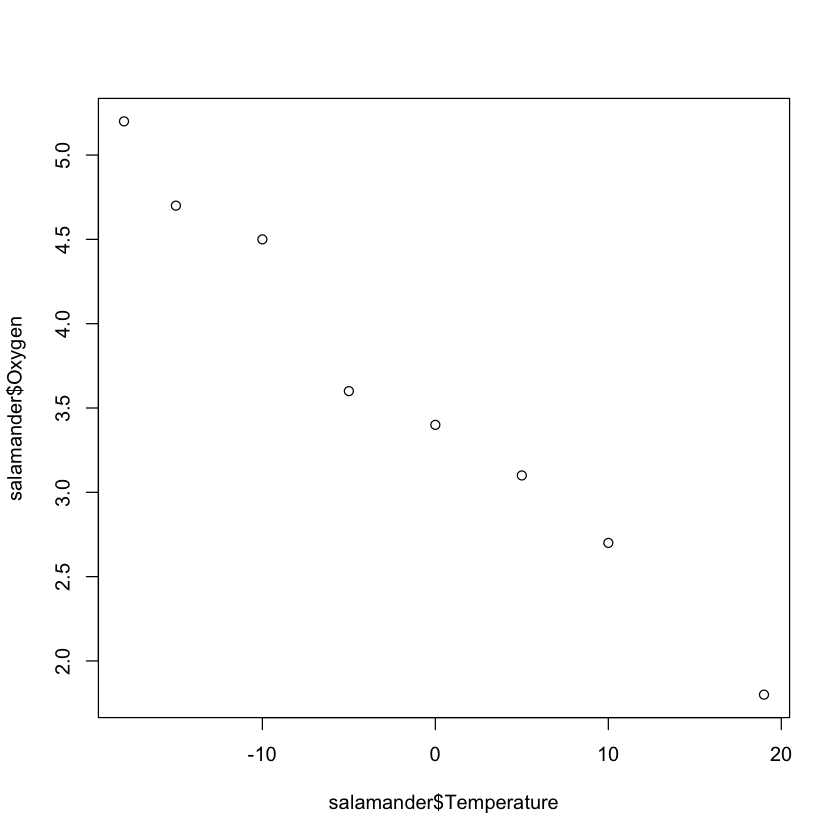

In [8]:
# create dataframe
salamander <- data.frame(Temperature = c(-18,-15,-10,-5,0,5,10,19),
                         Oxygen = c(5.2,4.7,4.5,3.6,3.4,3.1,2.7,1.8))

# plot data
plot(salamander$Oxygen ~ salamander$Temperature)

### 1. Create an equation to explain the relationship between temperature and oxygen consumption.

`Oxygen Consumption = 3.47142 - 0.08776(Temperature)`

In [9]:
# linear regression model and summarize results
salamander_lm <- lm(Oxygen ~ Temperature, data=salamander)
summary(salamander_lm)


Call:
lm(formula = Oxygen ~ Temperature, data = salamander)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.31022 -0.07552  0.03168  0.11685  0.15099 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.471422   0.060123   57.74 1.81e-09 ***
Temperature -0.087759   0.004993  -17.58 2.18e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1682 on 6 degrees of freedom
Multiple R-squared:  0.9809,	Adjusted R-squared:  0.9778 
F-statistic: 308.9 on 1 and 6 DF,  p-value: 2.177e-06


### 2. Test $H_0: \beta = 0$

Reject null (Fcalc > Fcrit)

In [10]:
# generate anova table
Anova(salamander_lm)

,Sum Sq,Df,F value,Pr(>F)
Temperature,8.7451541,1,308.9326,2.176599e-06
Residuals,0.1698459,6,NA,NA


In [11]:
Fcrit <- 8.81 # from table, alpha(2)=0.05, ndf=1, ddf=6
Fcalc <- 308.9326 # from anova table

### 3. What is the standard error of b_temperature?

In [12]:
SE_bTemp <- 0.004993 # from lm summary (coefficients)

### 4. What is the coefficient of determination?

In [13]:
r2 <- 0.9809 # from lm summary (multiple R-squared)

### 5. Calculate 95% confidence limits for $\beta$.

In [14]:
# calculate confidence interval from lm object
confint(salamander_lm, level = 0.95)

,2.5 %,97.5 %
(Intercept),3.32430603,3.61853853
Temperature,-0.09997604,-0.07554136


### 6. Examine the residuals to see if the data meets the assumptions.

I am not exactly sure how to interpret these charts with such few data points. Generally things look OK, except for the Scale-Location plot.  It seems like there is a problem with the lower temperatures (the plot increases before leveling off).

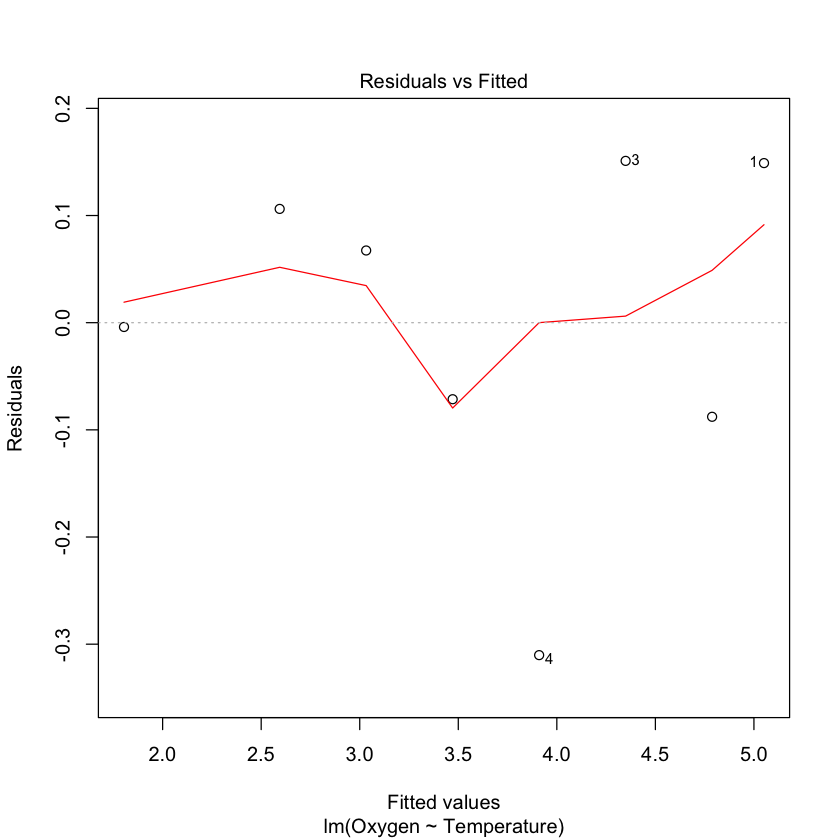

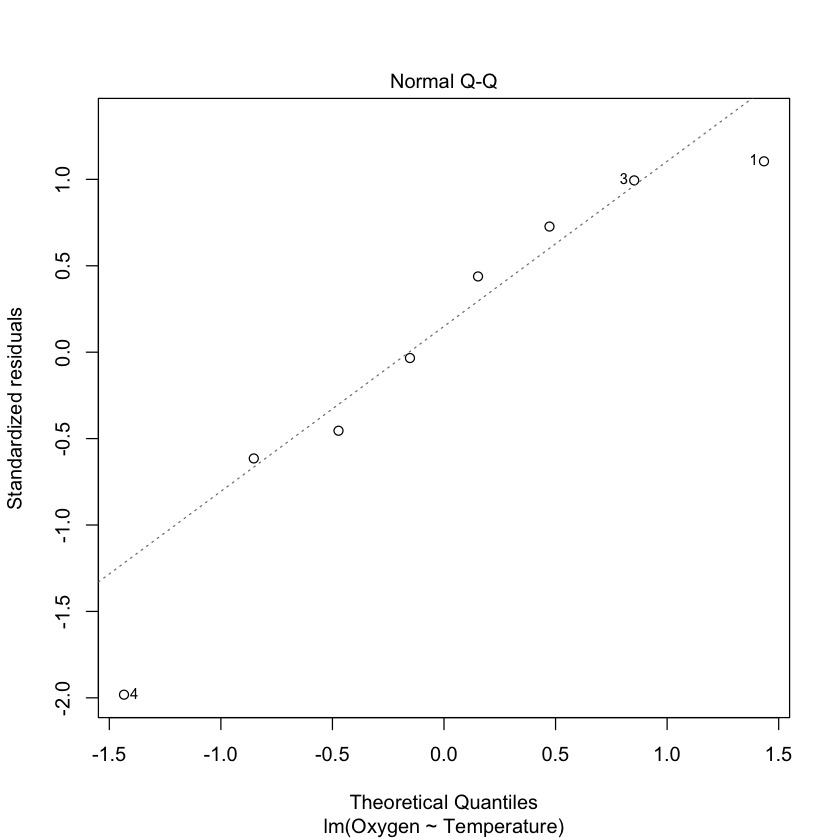

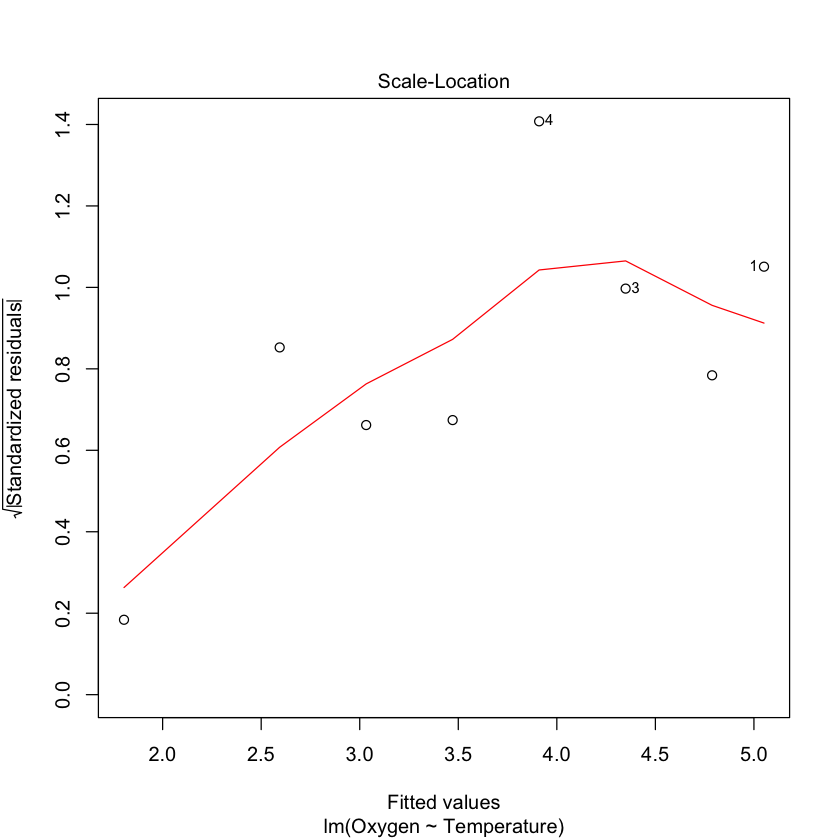

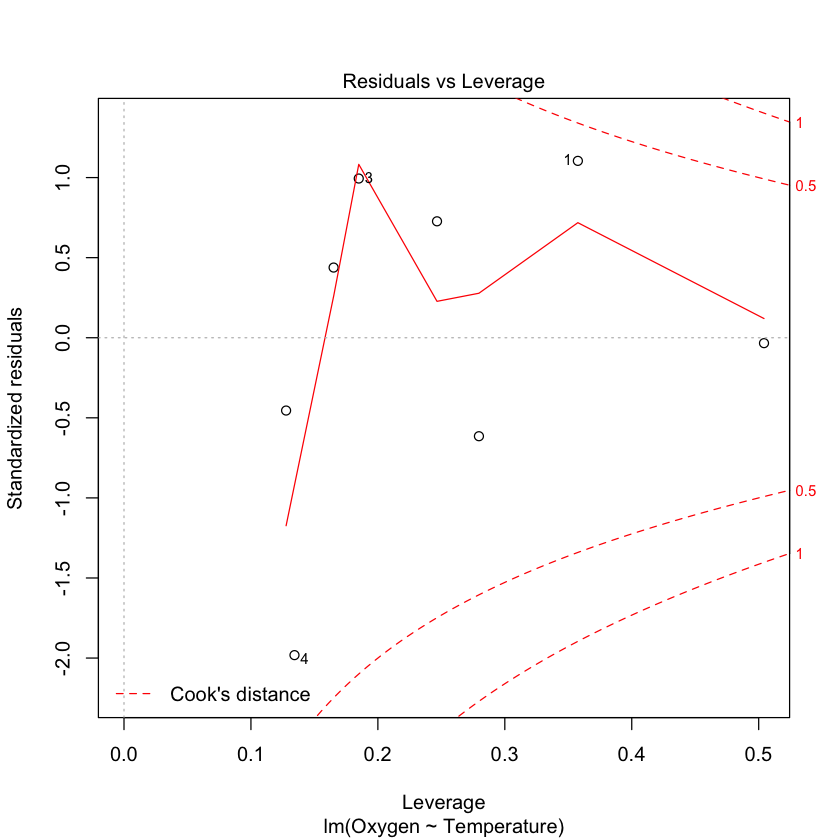

In [15]:
plot(salamander_lm)

### 7. Create a figure to show you results.

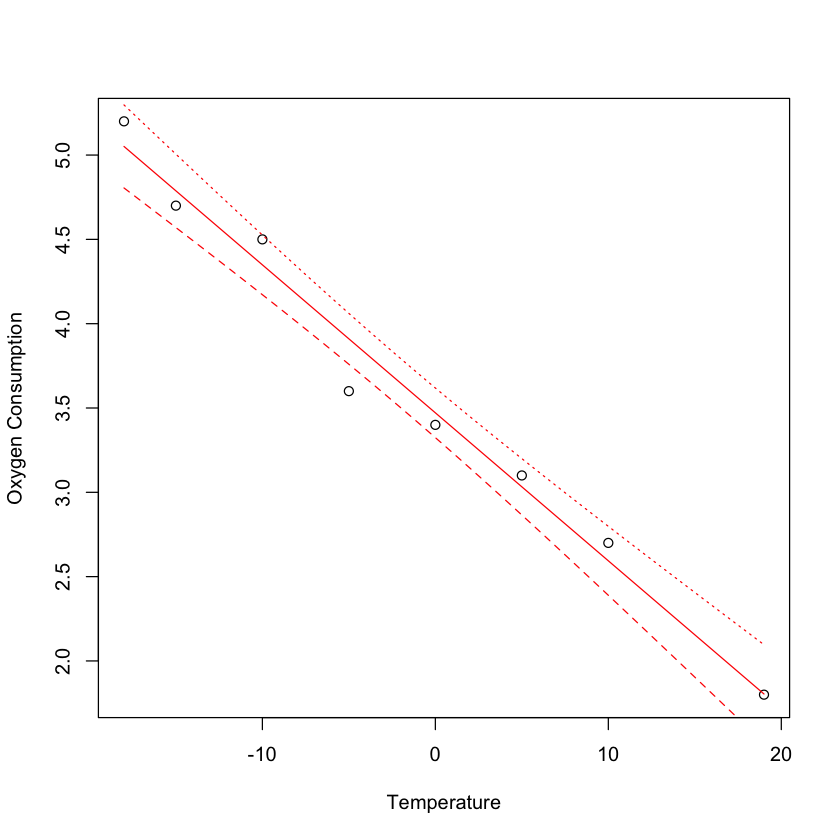

In [16]:
x <- seq(min(salamander$Temperature), max(salamander$Temperature), l=100)
y <- predict(salamander_lm, data.frame(Temperature=x), interval="c")
plot(salamander$Oxygen ~ salamander$Temperature,
     xlab='Temperature',
     ylab='Oxygen Consumption')
matlines(x,y,col=2)